# Image processing of MNIST dataset using deep learning

In [1]:
# Import libraries
import numpy as np
from numpy.random import seed
from tensorflow.random import set_seed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Rescaling, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt

# Make model repeatable
seed(1)
set_seed(1)

In [2]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Get familiar with the dataset

In [3]:
print(f'X_train shape:{X_train.shape}')
print(f'y_train shape:{y_train.shape}')
print(f'X_test shape:{X_test.shape}')
print(f'y_test shape:{y_train.shape}')

X_train shape:(60000, 28, 28)
y_train shape:(60000,)
X_test shape:(10000, 28, 28)
y_test shape:(60000,)


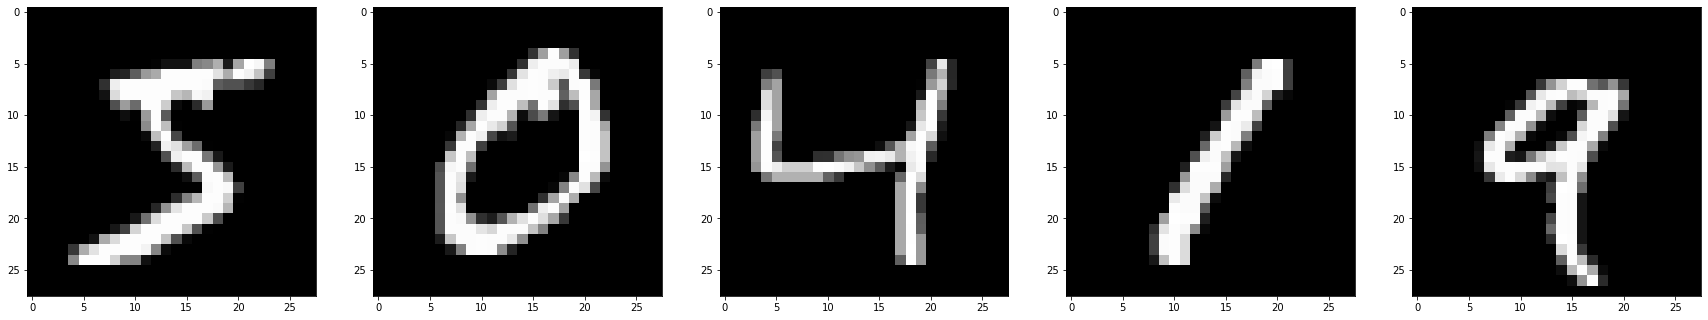

In [4]:
# Print example images
def print5(images):
    fig = plt.figure(figsize=(30, 10))
    for i in range(5):
        fig.add_subplot(151+i)
        plt.imshow(images[i], cmap=plt.get_cmap('gray'));

print5(X_train)

Since this is a pre-loaded dataset, it is not surprising that the images are all in relatively good quality. No further preprocessing will need to be done.

## Modeling and analysis

In [5]:
img_height = 28
img_width = 28

# Generate model
model = Sequential([
    Rescaling(1./255, input_shape=(img_height, img_width)), # Rescales pixel values from 0 - 1
    Flatten(), # Reshapes image
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
                  ])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit model
model.fit(x=X_train, y=y_train, batch_size=10, epochs=20, validation_split=.2, verbose=2);

Epoch 1/20
4800/4800 - 8s - loss: 0.2814 - accuracy: 0.9169 - val_loss: 0.1704 - val_accuracy: 0.9516 - 8s/epoch - 2ms/step
Epoch 2/20
4800/4800 - 7s - loss: 0.1395 - accuracy: 0.9583 - val_loss: 0.1246 - val_accuracy: 0.9629 - 7s/epoch - 2ms/step
Epoch 3/20
4800/4800 - 7s - loss: 0.1011 - accuracy: 0.9694 - val_loss: 0.1076 - val_accuracy: 0.9678 - 7s/epoch - 1ms/step
Epoch 4/20
4800/4800 - 7s - loss: 0.0797 - accuracy: 0.9758 - val_loss: 0.1263 - val_accuracy: 0.9627 - 7s/epoch - 1ms/step
Epoch 5/20
4800/4800 - 7s - loss: 0.0633 - accuracy: 0.9805 - val_loss: 0.1199 - val_accuracy: 0.9640 - 7s/epoch - 1ms/step
Epoch 6/20
4800/4800 - 7s - loss: 0.0529 - accuracy: 0.9831 - val_loss: 0.1021 - val_accuracy: 0.9694 - 7s/epoch - 1ms/step
Epoch 7/20
4800/4800 - 7s - loss: 0.0451 - accuracy: 0.9856 - val_loss: 0.1103 - val_accuracy: 0.9701 - 7s/epoch - 2ms/step
Epoch 8/20
4800/4800 - 7s - loss: 0.0379 - accuracy: 0.9878 - val_loss: 0.1065 - val_accuracy: 0.9693 - 7s/epoch - 1ms/step
Epoch 9/

## Evaluate model

In [6]:
# Model accuracy
loss, accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1418 - accuracy: 0.9740


We see that the validation and test accurracy are both high and similar to each other (approximately and 97%), indicating this is a good model, without overfitting to the training data.

## Predict

In [7]:
predicted = model.predict(X_test)
predicted[0]

array([1.0466491e-14, 5.4295160e-20, 4.3242314e-13, 4.5692525e-12,
       1.1583764e-28, 3.4577255e-17, 4.2565689e-30, 1.0000000e+00,
       8.9831544e-14, 8.7597806e-13], dtype=float32)

This array contains all probabilities that a particular digit is matched to the image. We can treat the highest probability as our prediction.

In [8]:
np.argmax(predicted[0])

7

Check this against the test labels:

In [9]:
y_test[0]

7

This is correct. Let's look at the image:

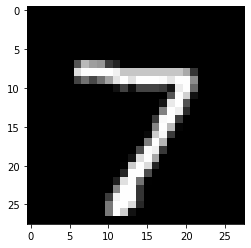

In [10]:
plt.imshow(X_test[0], cmap=plt.get_cmap('gray'));

This looks like a 7, as we expected. We can expect similar results with 97% accurracy.